In [1]:
# libraries needed
import requests
import time
import pickle
import random

In [6]:
#go to facebook developer page and get the access_token
token='EAACEdEose0cBAG04Vuqm5tXKMmkd5E2fFm4ZCZChVrC2CV4wvqvhjkZCFqeVwCgXXNL4aZAKVzCcDfu84dERQYZBekB1Go5Pgg7xHZC1H8MBLSm0khSV8SvJr4zQhRcLILycn9i3DhVORelPkFIT7enQnfk4meXVSoEj5gib8hACm5IfvwVSRQZCwFxNLnZBot3wBXk1GL845wZDZD'

In [7]:
#build url 
#go to facebook get the GameOfThrone page name and then get the id.
graph_url = 'https://graph.facebook.com/v2.11/'
req_url = '74133697733?fields=posts{message,created_time,comments.limit(0).summary(true), likes.limit(0).summary(true)}'
final_url = graph_url + req_url

In [17]:
# graph api call using requests get method.
results = requests.get(final_url,{'access_token':token})

In [18]:
print(results.json()['posts']['paging'])

{'cursors': {'before': 'Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R4ODNOREV6TXpZANU56Y3pNem8xTXpneU1qSTJPRE0yTkRVMU9Ua3lNVFk0RHd4aGNHbGZAjM1J2Y25sZAmFXUVBIVGMwTVRNek5qazNOek16WHpFd01UVTFNell4TlRJeE1EUXlOek0wRHdSMGFXMWxCbG9nUHk0QgZDZD', 'after': 'Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5QTNOREV6TXpZANU56Y3pNem90TkRReU9Ea3lNVE15TXpVMU9UTTNNakV4TXc4TVlYQnBYM04wYjNKNVgybGtEeDAzTkRFek16WTVOemN6TTE4eE1ERTFOVEUyTlRVM09UVTFNamN6TkE4RWRHbHRaUVpadlQ2TUFRPT0ZD'}, 'next': 'https://graph.facebook.com/v2.11/74133697733/posts?access_token=EAACEdEose0cBAG04Vuqm5tXKMmkd5E2fFm4ZCZChVrC2CV4wvqvhjkZCFqeVwCgXXNL4aZAKVzCcDfu84dERQYZBekB1Go5Pgg7xHZC1H8MBLSm0khSV8SvJr4zQhRcLILycn9i3DhVORelPkFIT7enQnfk4meXVSoEj5gib8hACm5IfvwVSRQZCwFxNLnZBot3wBXk1GL845wZDZD&fields=message%2Ccreated_time%2Ccomments.limit%280%29.summary%28true%29%2C+likes.limit%280%29.summary%28true%29&limit=25&after=Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5QTNOREV6TXpZANU56Y3pNem90TkRReU9Ea3lNVE15TXpVMU9UTTNNakV4TXc4TVlYQnBYM04wYjNKNVgybGtEeDAzTkRFek1

In [19]:
results = results.json()['posts']

In [20]:
print(len(results['data']))
print(results['data'][0])

25
{'message': '"Game of Thrones actor: Final season to be \'greatest thing ever aired" (via Entertainment Weekly).', 'created_time': '2017-11-30T17:26:06+0000', 'comments': {'data': [], 'summary': {'order': 'ranked', 'total_count': 3944, 'can_comment': True}}, 'likes': {'data': [], 'summary': {'total_count': 58386, 'can_like': True, 'has_liked': False}}, 'id': '74133697733_10155361521042734'}


In [21]:
results['paging']['next']

'https://graph.facebook.com/v2.11/74133697733/posts?access_token=EAACEdEose0cBAG04Vuqm5tXKMmkd5E2fFm4ZCZChVrC2CV4wvqvhjkZCFqeVwCgXXNL4aZAKVzCcDfu84dERQYZBekB1Go5Pgg7xHZC1H8MBLSm0khSV8SvJr4zQhRcLILycn9i3DhVORelPkFIT7enQnfk4meXVSoEj5gib8hACm5IfvwVSRQZCwFxNLnZBot3wBXk1GL845wZDZD&fields=message%2Ccreated_time%2Ccomments.limit%280%29.summary%28true%29%2C+likes.limit%280%29.summary%28true%29&limit=25&after=Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5QTNOREV6TXpZANU56Y3pNem90TkRReU9Ea3lNVE15TXpVMU9UTTNNakV4TXc4TVlYQnBYM04wYjNKNVgybGtEeDAzTkRFek16WTVOemN6TTE4eE1ERTFOVEUyTlRVM09UVTFNamN6TkE4RWRHbHRaUVpadlQ2TUFRPT0ZD'

In [22]:
data_got =[]
i =0
while True:
    try:
        time.sleep(random.randint(1,2))
        data_got.extend(results['data'])
        next_results = requests.get(results['paging']['next'])
        results = next_results.json()
        i = i + 1
        if i > 200:
            break;
    except:
        print("Done")
        break

Done


In [23]:
print(len(data_got))

2528


In [24]:
pickle.dump(data_got, open('got_100_data.data', 'wb'))

In [126]:
# load the data 
got_data = pickle.load(file=open('got_100_data.data','rb'))

In [127]:
#explore the data
#type of the data
print(type(got_data))
print(len(got_data))
#first record
print(got_data[0])

#last record
print(got_data[-1])

<class 'list'>
2528
{'message': '"Game of Thrones actor: Final season to be \'greatest thing ever aired" (via Entertainment Weekly).', 'created_time': '2017-11-30T17:26:06+0000', 'comments': {'data': [], 'summary': {'order': 'ranked', 'total_count': 3944, 'can_comment': True}}, 'likes': {'data': [], 'summary': {'total_count': 58386, 'can_like': True, 'has_liked': False}}, 'id': '74133697733_10155361521042734'}
{'message': '“When you play the game of thrones, you win or you die.” The struggle for the Iron Throne is about to begin. Watch a new preview. ', 'created_time': '2011-01-18T20:18:12+0000', 'comments': {'data': [], 'summary': {'order': 'chronological', 'total_count': 48, 'can_comment': True}}, 'likes': {'data': [], 'summary': {'total_count': 559, 'can_like': True, 'has_liked': False}}, 'id': '74133697733_148115408574991'}


In [128]:
#loading data into pandas dataframe.
import pandas as pd

In [129]:
#load data into dataframe
df = pd.DataFrame(got_data)

In [130]:
df.head()

,comments,created_time,id,likes,message
0,"{'data': [], 'summary': {'order': 'ranked', 't...",2017-11-30T17:26:06+0000,74133697733_10155361521042734,"{'data': [], 'summary': {'total_count': 58386,...","""Game of Thrones actor: Final season to be 'gr..."
1,"{'data': [], 'summary': {'order': 'ranked', 't...",2017-11-23T16:00:00+0000,74133697733_10155338187242734,"{'data': [], 'summary': {'total_count': 5560, ...",*CLINK*\nHappy Thanksgiving to all in the realm.
2,"{'data': [], 'summary': {'order': 'ranked', 't...",2017-11-21T15:46:33+0000,74133697733_10155337961602734,"{'data': [], 'summary': {'total_count': 13853,...","""The 'Game of Thrones' star stuns as BAZAAR's ..."
3,"{'data': [], 'summary': {'order': 'ranked', 't...",2017-11-18T16:26:03+0000,74133697733_10155330219067734,"{'data': [], 'summary': {'total_count': 3122, ...",Rally the realm.\nNight Of Too Many Stars bene...
4,"{'data': [], 'summary': {'order': 'ranked', 't...",2017-11-17T17:30:00+0000,74133697733_10156085563268933,"{'data': [], 'summary': {'total_count': 168625...",Rally the realm.\nKit Harington stars in Gunpo...


In [131]:
df_final = pd.io.json.json_normalize(got_data)

In [132]:
df_final.head()

,comments.data,comments.summary.can_comment,comments.summary.order,comments.summary.total_count,created_time,id,likes.data,likes.summary.can_like,likes.summary.has_liked,likes.summary.total_count,message
0,[],True,ranked,3944,2017-11-30T17:26:06+0000,74133697733_10155361521042734,[],True,False,58386,"""Game of Thrones actor: Final season to be 'gr..."
1,[],True,ranked,158,2017-11-23T16:00:00+0000,74133697733_10155338187242734,[],True,False,5560,*CLINK*\nHappy Thanksgiving to all in the realm.
2,[],True,ranked,335,2017-11-21T15:46:33+0000,74133697733_10155337961602734,[],True,False,13853,"""The 'Game of Thrones' star stuns as BAZAAR's ..."
3,[],True,ranked,126,2017-11-18T16:26:03+0000,74133697733_10155330219067734,[],True,False,3122,Rally the realm.\nNight Of Too Many Stars bene...
4,[],True,ranked,36407,2017-11-17T17:30:00+0000,74133697733_10156085563268933,[],True,False,168625,Rally the realm.\nKit Harington stars in Gunpo...


## Facebook Data Analysis with Python Part 5: Cleaning Data

In [133]:
#explore pandas dataframe work functions. 
df_final.columns

Index(['comments.data', 'comments.summary.can_comment',
       'comments.summary.order', 'comments.summary.total_count',
       'created_time', 'id', 'likes.data', 'likes.summary.can_like',
       'likes.summary.has_liked', 'likes.summary.total_count', 'message'],
      dtype='object')

In [134]:
df_final.drop(df_final.columns[[0,1,2]], axis=1, inplace=True)

In [10]:
#remove unused columns 
# df_final.drop(df_final.columns[[0,1,2]], axis=1, inplace=True)

In [135]:
df_final.head()

,comments.summary.total_count,created_time,id,likes.data,likes.summary.can_like,likes.summary.has_liked,likes.summary.total_count,message
0,3944,2017-11-30T17:26:06+0000,74133697733_10155361521042734,[],True,False,58386,"""Game of Thrones actor: Final season to be 'gr..."
1,158,2017-11-23T16:00:00+0000,74133697733_10155338187242734,[],True,False,5560,*CLINK*\nHappy Thanksgiving to all in the realm.
2,335,2017-11-21T15:46:33+0000,74133697733_10155337961602734,[],True,False,13853,"""The 'Game of Thrones' star stuns as BAZAAR's ..."
3,126,2017-11-18T16:26:03+0000,74133697733_10155330219067734,[],True,False,3122,Rally the realm.\nNight Of Too Many Stars bene...
4,36407,2017-11-17T17:30:00+0000,74133697733_10156085563268933,[],True,False,168625,Rally the realm.\nKit Harington stars in Gunpo...


In [136]:
df_final.drop(df_final.columns[[3,4,5]], axis=1, inplace=True)

In [137]:
df_final.head()

,comments.summary.total_count,created_time,id,likes.summary.total_count,message
0,3944,2017-11-30T17:26:06+0000,74133697733_10155361521042734,58386,"""Game of Thrones actor: Final season to be 'gr..."
1,158,2017-11-23T16:00:00+0000,74133697733_10155338187242734,5560,*CLINK*\nHappy Thanksgiving to all in the realm.
2,335,2017-11-21T15:46:33+0000,74133697733_10155337961602734,13853,"""The 'Game of Thrones' star stuns as BAZAAR's ..."
3,126,2017-11-18T16:26:03+0000,74133697733_10155330219067734,3122,Rally the realm.\nNight Of Too Many Stars bene...
4,36407,2017-11-17T17:30:00+0000,74133697733_10156085563268933,168625,Rally the realm.\nKit Harington stars in Gunpo...


In [138]:
df_final.rename(columns={'comments.summary.total_count':'total_comments', 'likes.summary.total_count': 'total_likes'},inplace=True)

In [139]:
df_final.head()

,total_comments,created_time,id,total_likes,message
0,3944,2017-11-30T17:26:06+0000,74133697733_10155361521042734,58386,"""Game of Thrones actor: Final season to be 'gr..."
1,158,2017-11-23T16:00:00+0000,74133697733_10155338187242734,5560,*CLINK*\nHappy Thanksgiving to all in the realm.
2,335,2017-11-21T15:46:33+0000,74133697733_10155337961602734,13853,"""The 'Game of Thrones' star stuns as BAZAAR's ..."
3,126,2017-11-18T16:26:03+0000,74133697733_10155330219067734,3122,Rally the realm.\nNight Of Too Many Stars bene...
4,36407,2017-11-17T17:30:00+0000,74133697733_10156085563268933,168625,Rally the realm.\nKit Harington stars in Gunpo...


## Facebook Data Analysis with Python Part 6: Top Commented posts

In [62]:
print(len(df_final))

2528


In [64]:
got_data = df_final
got_data.head()

,total_comments,created_time,id,total_likes,message
0,3944,2017-11-30T17:26:06+0000,74133697733_10155361521042734,58386,"""Game of Thrones actor: Final season to be 'gr..."
1,158,2017-11-23T16:00:00+0000,74133697733_10155338187242734,5560,*CLINK*\nHappy Thanksgiving to all in the realm.
2,335,2017-11-21T15:46:33+0000,74133697733_10155337961602734,13853,"""The 'Game of Thrones' star stuns as BAZAAR's ..."
3,126,2017-11-18T16:26:03+0000,74133697733_10155330219067734,3122,Rally the realm.\nNight Of Too Many Stars bene...
4,36407,2017-11-17T17:30:00+0000,74133697733_10156085563268933,168625,Rally the realm.\nKit Harington stars in Gunpo...


In [70]:
got_data['total_comments'] > 5000
got_data[got_data['total_comments'] > 10000]

,total_comments,created_time,id,total_likes,message
4,36407,2017-11-17T17:30:00+0000,74133697733_10156085563268933,168625,Rally the realm.\nKit Harington stars in Gunpo...
18,41149,2017-09-26T16:57:13+0000,74133697733_10155193973412734,120088,Music is coming to the worldwide realm.\nPurch...
45,11444,2017-08-28T19:02:00+0000,74133697733_10155115164417734,104912,"Go behind-the-scenes like never before with ""T..."
59,10109,2017-08-23T14:12:20+0000,74133697733_10155099389637734,68050,"""It was a real back and forth about who would ..."
62,18588,2017-08-22T17:42:07+0000,74133697733_10155097087912734,110417,“There’s only one war that matters and it is h...
70,10449,2017-08-19T14:59:00+0000,74133697733_10155078252722734,121567,Winter. Is. Here.\nA new episode of Game of Th...
81,55594,2017-08-13T15:02:00+0000,74133697733_10155058770482734,224837,Tonight.\n“Eastwatch” premieres at 9PM on HBO.
91,13201,2017-08-09T14:20:14+0000,74133697733_10155049157747734,101152,"“I remember looking at ‘The Loot Train Attack,..."
133,13619,2017-07-21T21:33:37+0000,74133697733_10154984699952734,96123,"""If we don't band together we will die.""\nWatc..."
144,12035,2017-07-17T20:09:29+0000,74133697733_10154970319607734,45065,A raven from the Citadel has landed. 🔖\nJohn B...


In [73]:
got_data.sort_values('total_comments', ascending=False, inplace=True)

In [75]:
got_data.head(10)

,total_comments,created_time,id,total_likes,message
224,272688,2017-05-24T16:44:29+0000,74133697733_10154790864632734,792756,The great war begins 7.16.\nRally the realm. S...
249,198357,2017-03-09T19:53:56+0000,74133697733_10154556026992734,70720,Almost there Game of Thrones fans. \nComment F...
248,197630,2017-03-09T20:11:10+0000,74133697733_10154555382832734,696126,The great war is here. #GoTS7 premieres 7.16.
196,168955,2017-06-21T15:59:51+0000,74133697733_10154877545592734,513761,"It may be the first day of Summer, but #Winter..."
512,101104,2016-04-11T01:24:52+0000,74133697733_10153642483542734,80613,NaN
510,97236,2016-04-11T16:01:17+0000,74133697733_10153643734562734,498598,Game of Thrones returns April 24 at 9PM. Watch...
507,89225,2016-04-13T17:00:03+0000,74133697733_10153647535247734,355549,"From King’s Landing to Dorne, explore the worl..."
560,80043,2016-02-15T01:59:21+0000,74133697733_10153489099842734,449470,Game of Thrones returns 4.24.16
584,71713,2015-11-23T16:00:22+0000,74133697733_10153329887947734,685377,APRIL. #GoTSeason6 #GameofThrones
324,70003,2016-07-22T23:24:57+0000,74133697733_10153871047482734,305070,The Game of Thrones cast sign posters for fans...


In [78]:
for post in got_data.head(10)['id']:
    print("https://facebook.com/"+post)

https://facebook.com/74133697733_10154790864632734
https://facebook.com/74133697733_10154556026992734
https://facebook.com/74133697733_10154555382832734
https://facebook.com/74133697733_10154877545592734
https://facebook.com/74133697733_10153642483542734
https://facebook.com/74133697733_10153643734562734
https://facebook.com/74133697733_10153647535247734
https://facebook.com/74133697733_10153489099842734
https://facebook.com/74133697733_10153329887947734
https://facebook.com/74133697733_10153871047482734


## Facebook Data Analysis with Python Part 7: Most Liked Posts

In [79]:
got_data.head()

,total_comments,created_time,id,total_likes,message
224,272688,2017-05-24T16:44:29+0000,74133697733_10154790864632734,792756,The great war begins 7.16.\nRally the realm. S...
249,198357,2017-03-09T19:53:56+0000,74133697733_10154556026992734,70720,Almost there Game of Thrones fans. \nComment F...
248,197630,2017-03-09T20:11:10+0000,74133697733_10154555382832734,696126,The great war is here. #GoTS7 premieres 7.16.
196,168955,2017-06-21T15:59:51+0000,74133697733_10154877545592734,513761,"It may be the first day of Summer, but #Winter..."
512,101104,2016-04-11T01:24:52+0000,74133697733_10153642483542734,80613,NaN


In [81]:
len(got_data[got_data['total_likes']>50000])

541

In [82]:
got_data.sort_values('total_likes', ascending=False, inplace=True)

In [83]:
got_data.head()

,total_comments,created_time,id,total_likes,message
224,272688,2017-05-24T16:44:29+0000,74133697733_10154790864632734,792756,The great war begins 7.16.\nRally the realm. S...
248,197630,2017-03-09T20:11:10+0000,74133697733_10154555382832734,696126,The great war is here. #GoTS7 premieres 7.16.
584,71713,2015-11-23T16:00:22+0000,74133697733_10153329887947734,685377,APRIL. #GoTSeason6 #GameofThrones
1032,6511,2014-05-07T00:30:00+0000,74133697733_10152142886637734,594325,"""I missed you, boy."""
572,35955,2016-01-07T23:32:45+0000,74133697733_10153412463832734,536456,4.24.16 #GoTSeason6


In [108]:
posts = got_data.head(10)[['id', 'message']]
posts['link'] = 'https://facebook.com/'+posts['id']
for post in posts['link']:
    print(post)

https://facebook.com/74133697733_10154790864632734
https://facebook.com/74133697733_10154555382832734
https://facebook.com/74133697733_10153329887947734
https://facebook.com/74133697733_10152142886637734
https://facebook.com/74133697733_10153412463832734
https://facebook.com/74133697733_10152674408122734
https://facebook.com/74133697733_10152203216737734
https://facebook.com/74133697733_10154877545592734
https://facebook.com/74133697733_10152775330297734
https://facebook.com/74133697733_10153643734562734


## Facebook Data Analysis with Python Part 8: Grouping data by day

In [160]:
new_df = pd.DataFrame(df_final[['created_time', 'total_likes', 'total_comments']])
new_df.columns

Index(['created_time', 'total_likes', 'total_comments'], dtype='object')

In [175]:
print(type(df_final['created_time'][0]))
# print(df_final['created_time'][0].split('T')[0])
pd.__version__

<class 'str'>


'0.20.1'

In [206]:
data_with_dates = pd.DataFrame(df_final[['created_time', 'total_likes', 'total_comments']])
splits = data_with_dates['created_time'].str.split('T')
data_with_dates['created_time'] = splits.str[0]
print(data_with_dates.head())
d_dates =  data_with_dates.groupby('created_time').sum()

  created_time  total_likes  total_comments
0   2017-11-30        58386            3944
1   2017-11-23         5560             158
2   2017-11-21        13853             335
3   2017-11-18         3122             126
4   2017-11-17       168625           36407


In [207]:
d_dates.head()

,total_likes,total_comments
created_time,,
2011-01-18,559,48
2011-01-19,615,65
2011-01-20,5256,835
2011-01-27,80,2
2011-01-31,269,28


In [213]:
data_with_dates['post'] = 1
data_with_dates.head()

,created_time,total_likes,total_comments,post
0,2017-11-30,58386,3944,1
1,2017-11-23,5560,158,1
2,2017-11-21,13853,335,1
3,2017-11-18,3122,126,1
4,2017-11-17,168625,36407,1


In [214]:
d_dates = data_with_dates.groupby('created_time').sum()

In [215]:
d_dates.head()

,total_likes,total_comments,post
created_time,,,
2011-01-18,559,48,1
2011-01-19,615,65,3
2011-01-20,5256,835,9
2011-01-27,80,2,1
2011-01-31,269,28,1


In [217]:
d_dates['post'].sum()

2528

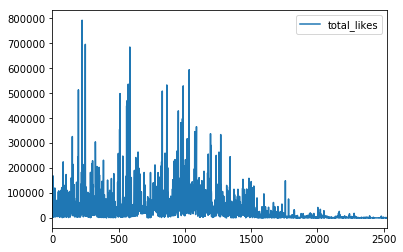

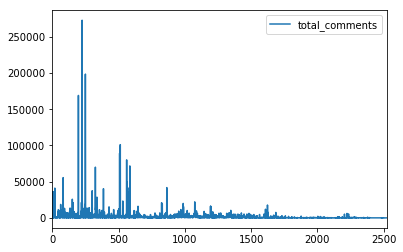

In [166]:
%matplotlib inline
new_df.describe() 
new_df[['created_time', 'total_likes']].plot(type='')
new_df[['created_time', 'total_comments']].plot()

In [151]:
new_df['created_time'] = pd.to_datetime(new_df['created_time'])
new_df.head()

,created_time,total_likes,total_comments
0,2017-11-30 17:26:06,58386,3944
1,2017-11-23 16:00:00,5560,158
2,2017-11-21 15:46:33,13853,335
3,2017-11-18 16:26:03,3122,126
4,2017-11-17 17:30:00,168625,36407


In [153]:
type(new_df['created_time'][0])
# dates = pd.DataFrame(got_data['created_time'])

# dates.groupby(dates.created_time.dt.month).agg('count')

pandas._libs.tslib.Timestamp

In [159]:
new_df.groupby('created_time').sum()

,total_likes,total_comments
created_time,,
2011-01-18 20:18:12,559,48
2011-01-19 20:43:50,615,65
2011-01-20 18:39:29,5256,835
2011-01-27 16:05:06,80,2
2011-01-31 18:08:35,269,28
2011-02-01 17:52:38,363,27
2011-02-02 16:22:06,282,20
2011-02-03 17:05:06,94,4
2011-02-05 18:45:04,333,24


In [56]:
# comments_5000.head()

In [57]:
# len(comments_5000)

In [58]:
# got_df.sort_values('total_comments', ascending=False)

In [59]:
# got_df.head()